In [0]:
# Make necessary/useful imports here
import pandas as pd
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Set pandas options to not truncate
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Mount data 
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
root_path = '/content/gdrive/My Drive/Datathon Citizens/data/'

Mounted at /content/gdrive


In [0]:
n = 6009259 # number of records in file
s = 60000 # sample size (can/should be changed to your preference)

skip_list = sorted(random.sample(range(1,n+1),n-s))
june_df = pd.read_csv(root_path + "zip9_coded_201906_pv.csv", skiprows=skip_list, dtype={'zip5': str})
demo_df = pd.read_csv(root_path + "zip9_demographics_coded_pv.csv", skiprows=skip_list, dtype={'zip5': str})

# Take a look at a few examples in the September credit bureau snapshot
june_df.head()

,zip5,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,mortgage1_limit,mortgage1_balance,mortgage1_open,mortgage2_limit,mortgage2_balance,mortgage2_open,mortgage3_limit,mortgage3_balance,mortgage3_open,mortgage4_limit,mortgage4_balance,mortgage4_open,mortgage5_limit,mortgage5_balance,mortgage5_open,total_mortgage_limit,total_mortgage_balance,total_mortgage_trades,mortgage1_loan_to_value,homeequity1_limit,homeequity1_balance,homeequity1_open,homeequity2_limit,homeequity2_balance,homeequity2_open,homeequity3_limit,homeequity3_balance,homeequity3_open,homeequity4_limit,homeequity4_balance,homeequity4_open,homeequity5_limit,homeequity5_balance,homeequity5_open,total_homeequity_limit,total_homeequity_balance,total_homeequity_trades,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open
0,01001,1725326,21766.000000,3242.87500,3.875000,0.268193,25845.750000,4472.062500,5.187500,0.281820,275933.33333,267508.666670,0.187500,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,275933.33333,267508.66667,0.187500,97.333333,220750.0,110178.500000,0.250000,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,220750.000000,110178.500000,0.250000,48.000000,0.250000,0.000000,0.875000,0.250000,0.187500
1,01001,3224130,17114.937500,5606.62500,2.562500,0.376075,25074.250000,8295.500000,4.750000,0.369730,149330.60000,112233.400000,0.312500,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,149330.60000,112233.40000,0.312500,75.600000,34400.0,28785.500000,0.125000,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,34400.000000,28785.500000,0.125000,82.500000,0.375000,0.250000,0.750000,0.125000,0.312500
2,01001,3661457,33749.000000,4917.92500,2.975000,0.213562,38753.600000,5457.075000,4.625000,0.185667,134011.11111,77365.222222,0.225000,125000.0,60118.0,0.025000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,147900.00000,84045.00000,0.250000,59.333333,69850.0,33523.250000,0.200000,75000.0,38404.0,0.05,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,78755.555556,38332.666667,0.250000,44.250000,0.250000,0.050000,0.775000,0.225000,0.225000
3,01001,3759129,26684.750000,2558.18750,2.437500,0.236412,33159.812500,2929.562500,4.187500,0.223683,203306.25000,150925.000000,0.250000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,203306.25000,150925.00000,0.250000,71.250000,30000.0,9080.666667,0.187500,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,30000.000000,9080.666667,0.187500,45.333333,0.250000,0.062500,0.812500,0.187500,0.250000
4,01001,4814344,29672.263158,4532.31579,3.578947,0.215149,35712.526316,5027.578947,5.526316,0.209988,137845.41667,119452.333330,0.631579,137820.0,127432.0,0.157895,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,172300.41667,151310.33333,0.789474,81.416667,73500.0,10145.000000,0.105263,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,73500.000000,10145.000000,0.105263,46.000000,0.368421,0.315789,0.736842,0.052632,0.631579


In [0]:
june_df.describe()

,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,mortgage1_limit,mortgage1_balance,mortgage1_open,mortgage2_limit,mortgage2_balance,mortgage2_open,mortgage3_limit,mortgage3_balance,mortgage3_open,mortgage4_limit,mortgage4_balance,mortgage4_open,mortgage5_limit,mortgage5_balance,mortgage5_open,total_mortgage_limit,total_mortgage_balance,total_mortgage_trades,mortgage1_loan_to_value,homeequity1_limit,homeequity1_balance,homeequity1_open,homeequity2_limit,homeequity2_balance,homeequity2_open,homeequity3_limit,homeequity3_balance,homeequity3_open,homeequity4_limit,homeequity4_balance,homeequity4_open,homeequity5_limit,homeequity5_balance,homeequity5_open,total_homeequity_limit,total_homeequity_balance,total_homeequity_trades,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open
count,6.000000e+04,60000.000000,60000.000000,60000.000000,59646.000000,60000.000000,60000.000000,60000.000000,59879.000000,4.885900e+04,4.885900e+04,60000.000000,1.335400e+04,1.335400e+04,60000.000000,4.325000e+03,4.325000e+03,60000.000000,1.720000e+03,1.720000e+03,60000.000000,7.810000e+02,7.810000e+02,60000.000000,4.900200e+04,4.900200e+04,60000.000000,48858.000000,2.815400e+04,2.815400e+04,60000.000000,3.649000e+03,3.649000e+03,60000.000000,7.440000e+02,744.000000,60000.000000,216.000000,216.000000,60000.000000,67.000000,67.000000,60000.000000,2.850500e+04,2.850500e+04,60000.000000,28101.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,3.337733e+06,20235.025894,4055.446254,2.290589,0.334764,25638.101670,6275.603035,3.621424,0.333779,2.003272e+05,1.732061e+05,0.277824,2.042413e+05,1.647375e+05,0.022870,2.024554e+05,1.578307e+05,0.006176,1.963315e+05,1.510724e+05,0.002353,1.977067e+05,1.533682e+05,0.001006,2.190503e+05,1.879564e+05,0.310228,83.899494,7.885146e+04,3.815054e+04,0.073752,7.955820e+04,3.639889e+04,0.005494,7.867611e+04,32457.071461,0.001045,83820.264661,32723.252315,0.000285,61846.641791,25215.582090,0.000085,8.330699e+04,4.007883e+04,0.080661,53.624912,0.316082,0.169334,0.687315,0.070817,0.281910
std,1.922719e+06,15745.236563,3383.465355,1.125329,0.188661,18461.330190,6312.421838,1.597006,0.182606,1.445816e+05,1.338337e+05,0.215185,1.687012e+05,1.544096e+05,0.052724,1.797449e+05,1.610548e+05,0.026085,1.768579e+05,1.571446e+05,0.015923,2.241309e+05,2.088306e+05,0.010141,1.738888e+05,1.585370e+05,0.250317,104.974422,8.928322e+04,5.231961e+04,0.105960,9.814383e+04,6.936113e+04,0.025293,8.875063e+04,60930.914103,0.010787,117006.802325,82703.939114,0.005412,67560.478421,50749.989769,0.002788,9.660466e+04,5.773456e+04,0.118235,35.334959,0.176712,0.135101,0.214360,0.104078,0.217096
min,3.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,6.800000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,500.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.664161e+06,8140.031250,1661.210784,1.500000,0.198687,11870.333333,2693.500000,2.538462,0.208274,1.107834e+05,9.056898e+04,0.090909,1.005462e+05,7.064650e+04,0.000000,9.508000e+04,6.314300e+04,0.000000,8.800000e+04,5.716425e+04,0.000000,8.720000e+04,5.485000e+04,0.000000,1.150211e+05,9.397746e+04,0.095238,77.500000,3.000000e+04,9.285750e+03,0.000000,2.500000e+04,0.000000e+00,0.000000,2.700000e+04,0.000000,0.000000,25000.000000,0.000000,0.000000,22000.000000,0.000000,0.000000,3.150000e+04,9.545000e+03,0.000000,28.000000,0.187500,0.071429,0.571429,0.000000,0.090909
50%,3.341794e+06,16859.464285,3270.965385,2.250000,0.309033,22410.178572,4

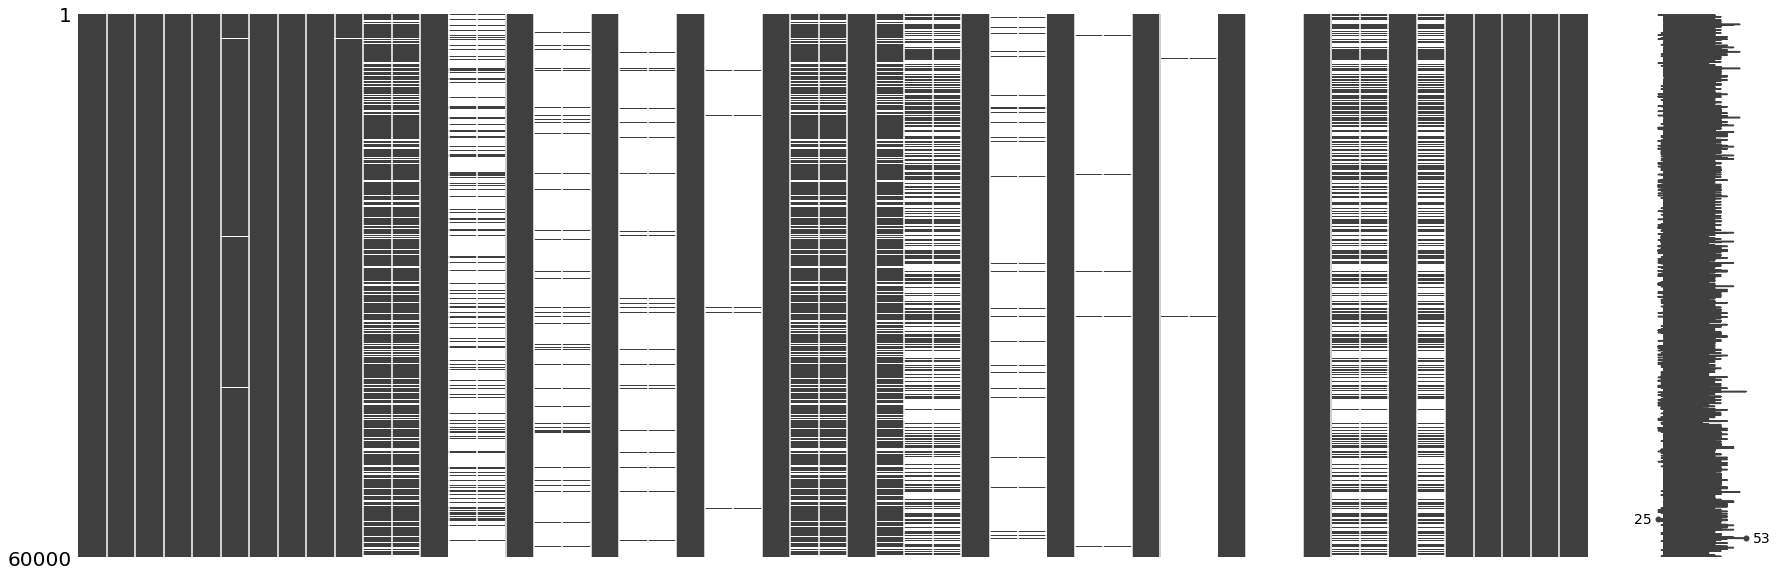

In [0]:
import missingno
missingno.matrix(june_df, figsize = (30,10))

In [0]:
june_df.isnull().sum()

zip5                         0    
zip9_code                    0    
bankcard_limit               0    
bankcard_balance             0    
bankcard_trades              0    
bankcard_util                354  
total_revolving_limit        0    
total_revolving_balance      0    
total_revolving_trades       0    
total_revolving_util         121  
mortgage1_limit              11141
mortgage1_balance            11141
mortgage1_open               0    
mortgage2_limit              46646
mortgage2_balance            46646
mortgage2_open               0    
mortgage3_limit              55675
mortgage3_balance            55675
mortgage3_open               0    
mortgage4_limit              58280
mortgage4_balance            58280
mortgage4_open               0    
mortgage5_limit              59219
mortgage5_balance            59219
mortgage5_open               0    
total_mortgage_limit         10998
total_mortgage_balance       10998
total_mortgage_trades        0    
mortgage1_loan_to_va

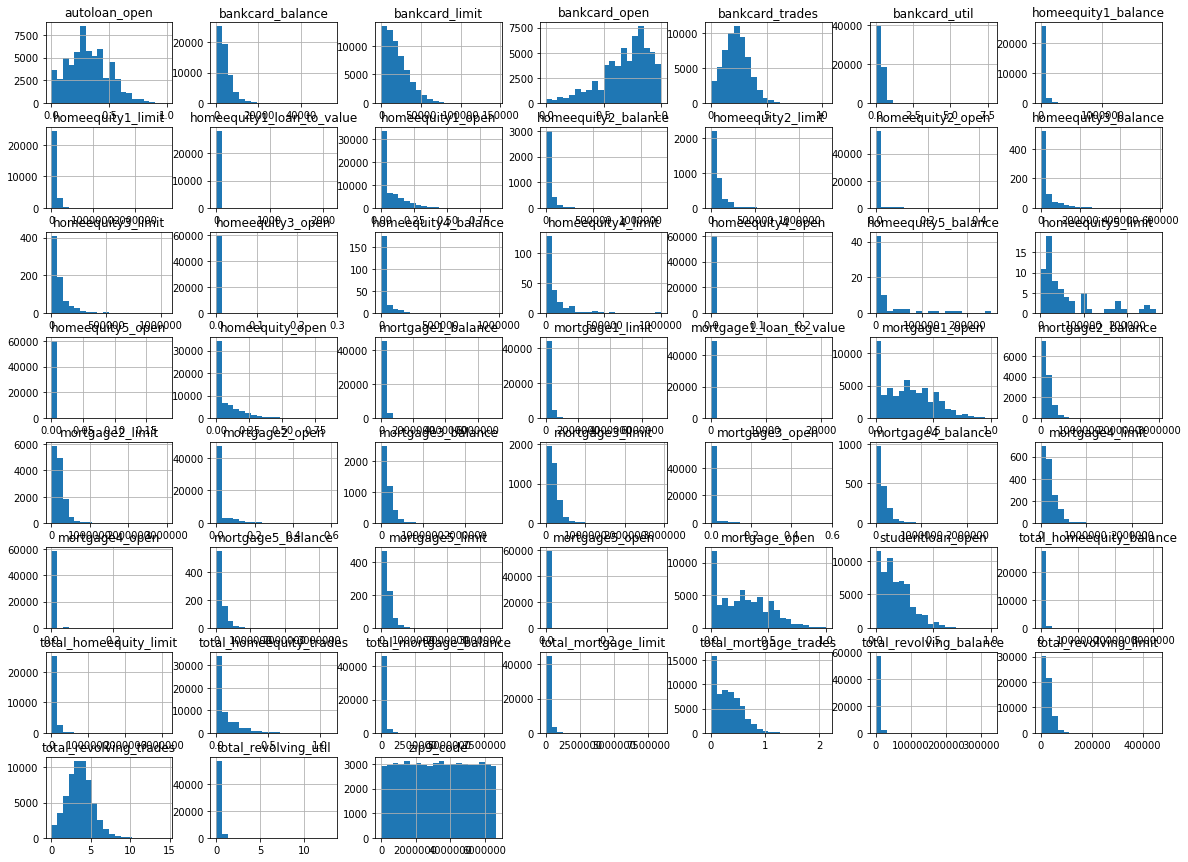

In [0]:
june_df.hist(bins = 20, figsize=(20,15))
figure.tight_layout(pad=5.0)
plt.show()

ValueError: ignored

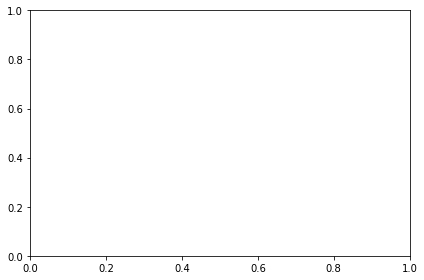

In [0]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(june_df['bankcard_limit'], june_df['bankcard_util'])
fig.xlabel('bankcard_limit')
fig.ylabel('bankcard_util')